In [2]:
%matplotlib ipympl
from matplotlib import colormaps
import matplotlib.pyplot as plt
import numpy as np
from functools import partial
from onix.data_tools import get_experiment_data
from onix.analysis.fitter import Fitter
from onix.analysis.helper import group_and_average_data
from tqdm import tqdm

In [139]:

# data_numbers = range(516432, 517067) #initial
# data_numbers = range(517068, 517209) # 45 deg half wave plate
# data_numbers = range(517210, 517386) # 90 deg half wave plate
# data_numbers = range(517387, 518194) # 90 deg half wave plate realigned
data_numbers = range(518255, 519042) # no HWP realigned
data_numbers = range(522576, 523017) # no HWP realigned
data_numbers = range(523018, 523404) # no HWP realigned
data_numbers = range(523405, 523684) # no HWP realigned
# data_numbers = range(523685, 524131) # no HWP realigned
# data_numbers = range(524132, 524238) # no HWP realigned
# data_numbers = range(524132, 524352) # no HWP realigned
# data_numbers = range(524132, 524458) # no HWP realigned
#data_numbers = range(524459, 524569) # no HWP realigned
#data_numbers = range(524570, 524677) # 5-7 K
#data_numbers = range(524678, 524790) # 8-9 K
#data_numbers = range(524791, 524896) # 10-10.5 K
data_numbers = range(524897, 525005) # 15 K
data_numbers = range(525006, 525117) # 5 K, some holes burned
data_numbers = range(525209, 525281) # 5 K
data_numbers = range(525669, 525773) # 5 K
data_numbers = range(525778, 525932) # 5 K, etalon scan
data_numbers = range(525934, 526344) # 5 K, etalon scan
data_numbers = range(526345, 526709)
data_numbers = range(526755, 529024)
data_numbers = range(529036, 529140) # 5 K, piezo scan, after cleaning crystal surfaces


## E3 CRYSTAL
data_numbers = range(529146, 529233)

transmissions = []
monitors = []
optical_freqs = []
for data_number in data_numbers:
    data, headers = get_experiment_data(data_number)
    detunings_MHz = headers["detunings"].to("MHz").magnitude
    transmissions_avg = group_and_average_data(data["transmissions_avg"], headers["params"]["detect"]["cycles"])
    monitors_avg = group_and_average_data(data["monitors_avg"], headers["params"]["detect"]["cycles"])
    transmissions.append(transmissions_avg["antihole"][0])
    monitors.append(monitors_avg["antihole"][0])
    try:
        float(headers["params"]["wavemeter"]["freq"])
        optical_freqs.append(headers["params"]["wavemeter"]["freq"])
    except ValueError:
        optical_freqs.append(np.nan)

transmissions = np.array(transmissions)
monitors = np.array(monitors)
optical_freqs = np.array(optical_freqs) - 516847.603

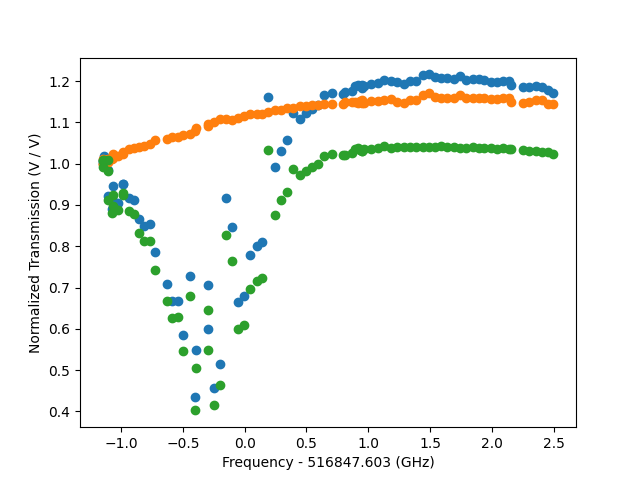

In [142]:
fig, ax = plt.subplots()
ax.scatter(optical_freqs, transmissions)
ax.scatter(optical_freqs, monitors)
ax.scatter(optical_freqs, transmissions / monitors)
ax.set_xlabel("Frequency - 516847.603 (GHz)")
ax.set_ylabel("Normalized Transmission (V / V)")
#ax.set_xlim([-3, 3])
plt.show()